# 0. Set up environment
- Load libraries
- Define functions

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import cobra
import copy

In [3]:
# Load models
cd630=cobra.io.read_sbml_model("models/iCdG709.sbml")
temp = copy.deepcopy(cd630)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21


https://identifiers.org/seed.reaction/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpdj3w608t.lp
Reading time = 0.01 seconds
: 1243 rows, 2646 columns, 11514 nonzeros


## Define functions

In [4]:
def addForwardConstraints_1(model, reactions, vref, fs_ref, epsilon):
    for r in list(reactions):
        rxn = model.reactions.get_by_id(r)
        yf = model.problem.Variable('yf_' + r, lb = 0, ub =1, type = "integer") 
        yi = model.problem.Variable("yi_" + r, lb = 0, ub =1, type = "integer")
        a = (vref[r] + epsilon[r])
        b = fs_ref[r].min()
        fc = model.problem.Constraint(rxn.flux_expression - a*yf - b*yi, lb = 0, name = 'fc_' + r)
        vc = model.problem.Constraint(yi + yf, lb=1, ub=1, name = 'vc_' + r)
        model.add_cons_vars([fc,vc])

In [5]:
def addReverseConstraints_1(model, reactions, vref, fs_ref, epsilon):
    for r in list(reactions):
        rxn = model.reactions.get_by_id(r)
        yb = model.problem.Variable('yb_' + r, lb = 0, ub =1, type = "integer") 
        yi = model.problem.Variable("yi_" + r, lb = 0, ub =1, type = "integer")
        a = (vref[r] - epsilon[r])
        b = fs_ref[r].max()
        bc = model.problem.Constraint(rxn.flux_expression - a*yb - b*yi, ub = 0, name = 'bc_' + r)
        vc = model.problem.Constraint(yi + yb, lb=1, ub=1, name = 'vc_' + r)
        model.add_cons_vars([bc,vc])

In [6]:
def addMIQP_1(model, rs, right, left, vref):
    yif = [model.problem.Variable('yi_' + x) for x in right]
    yib = [model.problem.Variable('yi_' + x) for x in left] 
    v_rs = []
    for r in list(rs):
        rxn = model.reactions.get_by_id(r)
        v_rs.append((vref[r] - rxn.flux_expression)**2)
        
    miqp = model.problem.Objective(0.34 * sum(v_rs) + 0.33*sum(yif) + 0.33*sum(yib),direction = 'min')
    
    model.objective = miqp

In [7]:
def centroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0])
    sum_y = np.sum(arr[:, 1])
    return sum_x/length, sum_y/length

# 1. Determine the baseline flux distribution at the source state (v-ref)

In [8]:
# Load riptide
from riptide import *

In [9]:
# Load transcriptomic data
bhis = riptide.read_transcription_file('../data/counts/gse165116_bhis9h.tsv', norm=False) # Already normalized
d120 = riptide.read_transcription_file('../data/counts/gse165116_D1209h.tsv', norm=False) # Already normalized
d240 = riptide.read_transcription_file('../data/counts/gse165116_D2409h.tsv', norm=False) # Already normalized

In [10]:
# Contextualize models w/riptide
rip_bhis = riptide.contextualize(model=cd630, transcriptome=bhis, conservative = True, silent = True) # 594 rxns, 24 unique
rip_d240 = riptide.contextualize(model=cd630, transcriptome=d240, conservative = True, silent = True) # 613 rxns, 43 unique

Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpoolr9rnu.lp
Reading time = 0.01 seconds
: 1243 rows, 2646 columns, 11514 nonzeros
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmp_i05m_j1.lp
Reading time = 0.01 seconds
: 1243 rows, 2646 columns, 11514 nonzeros
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpxoe0bixr.lp
Reading time = 0.01 seconds
: 1243 rows, 2646 columns, 11514 nonzeros
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpaejc2_id.lp
Reading time = 0.01 seconds
: 1243 rows, 2646 columns, 11514 nonzeros
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpug7ezrad.lp
Reading time = 0.01 seconds
: 657 rows, 1188 columns, 5382 nonzeros


/Users/dap5mb/opt/anaconda3/lib/python3.8/site-packages/optlang/interface.py:1474: DeprecationWarning: Deprecated, pass a TempConstr or use Model.addLConstr
  self._add_constraints(add_constr)


Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpk81yi_qp.lp
Reading time = 0.01 seconds
: 660 rows, 1191 columns, 7763 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpa1h0h_qp.lp
Reading time = 0.01 seconds
: 660 rows, 1191 columns, 7763 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmp2_qbgk54.lp
Reading time = 0.01 seconds
: 660 rows, 1191 columns, 7763 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmp1_jdu7tj.lp
Reading time = 0.01 seconds
: 660 rows, 1191 columns

/Users/dap5mb/opt/anaconda3/lib/python3.8/site-packages/optlang/interface.py:1474: DeprecationWarning: Deprecated, pass a TempConstr or use Model.addLConstr
  self._add_constraints(add_constr)


Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpbg3r3pga.lp
Reading time = 0.01 seconds
: 660 rows, 1191 columns, 7763 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpwp4pi5p9.lp
Reading time = 0.01 seconds
: 660 rows, 1191 columns, 7763 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpmhz_1yv0.lp
Reading time = 0.01 seconds
: 660 rows, 1191 columns, 7763 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpwbqtdqw1.lp
Reading time = 0.01 seconds
: 660 rows, 1191 columns

/Users/dap5mb/opt/anaconda3/lib/python3.8/site-packages/optlang/interface.py:1474: DeprecationWarning: Deprecated, pass a TempConstr or use Model.addLConstr
  self._add_constraints(add_constr)


Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpgbljh7xv.lp
Reading time = 0.01 seconds
: 674 rows, 1229 columns, 7973 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmp4ux2w_pf.lp
Reading time = 0.01 seconds
: 674 rows, 1229 columns, 7973 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpk8zlydop.lp
Reading time = 0.01 seconds
: 674 rows, 1229 columns, 7973 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmp_25us02u.lp
Reading time = 0.01 seconds
: 674 rows, 1229 columns

/Users/dap5mb/opt/anaconda3/lib/python3.8/site-packages/optlang/interface.py:1474: DeprecationWarning: Deprecated, pass a TempConstr or use Model.addLConstr
  self._add_constraints(add_constr)


Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmph42kauvc.lp
Reading time = 0.01 seconds
: 674 rows, 1229 columns, 7973 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmp3ixtnupt.lp
Reading time = 0.01 seconds
: 674 rows, 1229 columns, 7973 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmp3w3sy3ge.lp
Reading time = 0.01 seconds
: 674 rows, 1229 columns, 7973 nonzeros
Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-21
Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpox4i071d.lp
Reading time = 0.01 seconds
: 674 rows, 1229 columns

In [11]:
# Flux sample w/riptide (default = 500 samples)
fs_ref = rip_bhis.flux_samples # reference state (high toxin)
fs_tar = rip_d240.flux_samples # target state (low toxin)

In [12]:
# Merge flux samples 
fs_ref['condition'] = 'reference'
fs_tar['condition'] = 'target'
fsdf = pd.concat([fs_ref, fs_tar])

#### CHECKPOINT

In [24]:
#riptide.save_output(rip_bhis, '../data/mta_rip_bhis.json')
#riptide.save_output(rip_d240, '../data/mta_rip_d240.json')
#fsdf.to_csv('../data/mta_fluxSampling1.csv')
fsdf = pd.read_csv('../data/mta_fluxSampling1.csv')

## Calculate centroid of flux samples

In [26]:
from sklearn import metrics
from sklearn import manifold
import matplotlib.pyplot as plt

In [27]:
# Calculate distance matrix
distBC = metrics.pairwise_distances(fsdf.drop(columns='condition').fillna(0), metric = 'braycurtis')
# Set nmds up
nmds = manifold.MDS(n_components=2, max_iter=500, dissimilarity = 'precomputed', random_state = 22)
# Dimensionality reduction transformation
coords = nmds.fit_transform(distBC)
nmds_df = pd.DataFrame(data = coords, columns = ['nmds1', 'nmds2'])
# Add condition column
nmds_df = pd.concat([nmds_df, fsdf.reset_index()[['condition']]], axis = 1)

In [28]:
# Calculate centroids
cent_ref = centroidnp(coords[:500,:]) #(-0.16655689738175, -0.0480122287588119)
cent_tar = centroidnp(coords[500:,:]) #(0.16655689738175, 0.048012228758811906)
print(cent_ref)
print(cent_tar)

# Calculate distance to centroid
dist_ref = np.sqrt((coords[:500,0] - cent_ref[0])**2 + (coords[:500,1]-cent_ref[1])**2)
dist_tar = np.sqrt((coords[500:,0] - cent_tar[0])**2 + (coords[500:,1]-cent_tar[1])**2)

(-0.16655689738175, -0.0480122287588119)
(0.16655689738175, 0.048012228758811906)


In [30]:
# Get index of closest point to centroid
pd.DataFrame(data = dist_ref, columns = ['dist']).sort_values('dist') # Index of closest point to reference centroid = 185
pd.DataFrame(data = dist_tar, columns = ['dist']).sort_values('dist') # Index of closest point to target centroid = 91 + 500 = 591

,dist
91,0.005495
203,0.011825
90,0.014514
18,0.015198
44,0.016280
...,...
156,0.324503
420,0.326627
192,0.328012
154,0.334290


In [32]:
# Get coordinates of closest points
coords[185,:] #[-0.16932191, -0.04313904]
coords[591,:] #[0.16584307, 0.05346033]

array([0.16584307, 0.05346033])

In [33]:
# Set reference and target vectors
vref = fsdf.drop(columns='condition').iloc[185, :]
vtar = fsdf.drop(columns='condition').iloc[591, :]

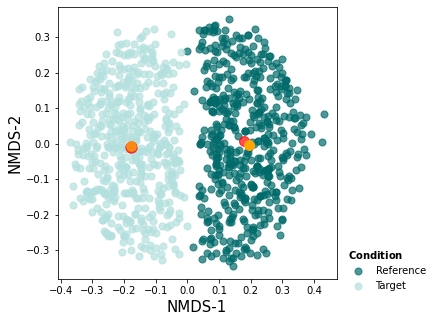

In [55]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('NMDS-1', fontsize = 15)
ax.set_ylabel('NMDS-2', fontsize = 15)
#ax.set_title('NMDS: Flux Sampling', fontsize = 20)
targets = nmds_df['condition'].unique().tolist()
colors = ['#006a6a', '#b3e0de']
for target, color in zip(targets,colors):
    indicesToKeep = nmds_df['condition'] == target
    ax.scatter(nmds_df.loc[indicesToKeep, 'nmds1'], nmds_df.loc[indicesToKeep, 'nmds2'], 
               c = color,
               s = 50,
               alpha = 0.7)
ax.legend(['Reference','Target'], loc=(1.025,-0.06), title='$\\bf{Condition}$',frameon=False)._legend_box.align = "left"


# Centroids
ax.scatter(0.17940587403077238, 0.008249341670282379, c = 'red', s=100, alpha = 0.7)
ax.scatter(-0.17940587403077238, -0.00824934167028238, c = 'red', s=130, alpha = 0.7)

# Sample closest to centroid
ax.scatter(0.19536108, -0.00463713, c = 'orange', s=100)
ax.scatter(-0.17907531, -0.00783775, c = 'orange', s=90, alpha = 0.7)
#plt.savefig('../figures/mtaFS_PCA3.jpeg',bbox_inches='tight', dpi = 600)

# To Do:
## Add alpha to colors?
## Adjust aspect ratio (5 x 35) > still not quite right

# 2. Analyse source and target gene expression to determine changed and unchanged rxns

In [34]:
# Load scipy
import scipy.stats
import statsmodels.stats.multitest

In [35]:
# fill nan w/0
fsdf = fsdf.fillna(0)

In [36]:
fs_ref1 = fsdf.loc[fsdf['condition']=='reference'].drop(columns='condition')
fs_tar1 = fsdf.loc[fsdf['condition']=='target'].drop(columns='condition')

## Mann-Whitney U

In [37]:
# Mann Whitney U test
p = list()
u = list()
o = list()
ids = list()
for x in fs_ref1:
    try:
        mw = scipy.stats.mannwhitneyu(fs_ref1[x], fs_tar1[x], alternative = 'two-sided')
    except ValueError:
        #print("%s median flux is identical" %x)
        o.append(x)
    else:
        p1 = mw[1]
        u1 = mw[0]
        p.append(p1)
        u.append(u1)
        ids.append(x)


In [38]:
# Multiple tests correction
p_adj = statsmodels.stats.multitest.multipletests(p, method='bonferroni')[1]

In [39]:
# Merge statistical measures into df (add unchanged rxns from list = o later)
mwdf = pd.DataFrame()
mwdf['rxn'] = ids
mwdf['u'] = u
mwdf['p'] = p
mwdf['p_adj'] = p_adj

In [43]:
mwdf.loc[mwdf['p_adj']>0.05].shape # unchanged = 68 rxns + 228 rxns (from o list) = 296
mwdf.loc[mwdf['p_adj']<0.05].shape # changed = 341 rxns

(341, 4)

In [44]:
# Sort rxns into groups (unchanged)
mwdf['group'] = 'unchanged'
#mwdf.loc[mwdf['p_adj']>0.05, 'group'] = 'unchanged' # optimization goal: maintain same flux rate

In [46]:
# Sort rxns into groups (changed: left, right)
for rxn in mwdf.loc[mwdf['p_adj']<0.05, 'rxn']: # rxns w/significant adjusted p-values
    d = fs_tar1[rxn].median() - fs_ref1[rxn].median() # difference (target - source)
    if d > 0:
        mwdf.loc[mwdf['rxn']==rxn, 'group'] = 'right' # optimization goal: push flux to the right (194 right rxns)
    else:
        mwdf.loc[mwdf['rxn']==rxn, 'group'] = 'left' # optimization goal: push flux to the left (147 left rxns)

In [48]:
# Add the rest of the unchanged rxns
for x in o:
    mwdf = mwdf.append({'rxn':x, 'group':'unchanged'}, ignore_index = True)

In [49]:
mwdf['group'].value_counts()

#unchanged    296
#right        194
#left         147

unchanged    296
right        194
left         147
Name: group, dtype: int64

In [777]:
mwdf['group2'].value_counts()

unchanged    536
right         55
left          46
Name: group2, dtype: int64

## Absolute flux difference >10

In [72]:
# Get rxns with an absolute flux difference > 10
dif10 = {i for i,t,r in zip(vref.index, vtar, vref) if np.abs(t - r) > 10} # 134 rxns

In [73]:
# Rxns with significant difference by MW-U test
mwuSig = set(mwdf.loc[mwdf['p_adj']<0.05, 'rxn'].to_list()) # 341 rxns

In [74]:
# Intersection of rxns with flux difference >10 and p_adj<0.05
CR = dif10.intersection(mwuSig) # 101 rxns

In [75]:
# Add column for alternative changed rxn selection
mwdf['group2'] = 'unchanged'

In [76]:
# For rxns in changed rxn set, copy flux direction previously calculated in 'group' column
mwdf.loc[mwdf['rxn'].isin(CR), 'group2'] = mwdf.loc[mwdf['rxn'].isin(CR), 'group']

#unchanged    536
#right         55
#left          46

In [80]:
mwdf['group2'].value_counts()

unchanged    536
right         55
left          46
Name: group2, dtype: int64

# 3. Solve MIQP problem

In [50]:
# Load some more libraries
import math

In [190]:
# Make a copy of the model
ref1 = copy.deepcopy(rip_bhis.model)

Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpri_5jkh5.lp
Reading time = 0.01 seconds
: 657 rows, 1188 columns, 5382 nonzeros


In [191]:
# Baseline flux
ref1.slim_optimize() #116.28728528139678

116.28728528139678

## Define variables and constraints

In [52]:
# Calculate epsilon for each rxn (minimum change in flux to be statistically significant)
# Basically back-calculate the one-sided t-test
# degrees of freedom = 499, alpha = 0.05, t-test critical value = 1.9652
t = 1.9652
epsilon0 = ((t)*(fs_ref1.std(axis = 0)/math.sqrt(500)))

# Problems: 
## flux distributions aren't normal 

### Using MWU significance

In [192]:
# Set of forward reactions present in the reference model
right = {x for x in mwdf.loc[mwdf['group']=='right', 'rxn']} #194 rxns
right.intersection_update({x.id for x in ref1.reactions}) #178 rxns

# 16 rxns not present in model

In [193]:
# Set of backward reactions present in the reference model
left = {x for x in mwdf.loc[mwdf['group']=='left', 'rxn']} #147 rxns
left.intersection_update({x.id for x in ref1.reactions}) #132 rxns

# 15 rxns not present in model

In [194]:
# Set of unchanged reactions present in the reference model
rs = {x for x in mwdf.loc[mwdf['group']=='unchanged', 'rxn']} #296 rxns
rs.intersection_update({x.id for x in ref1.reactions}) #284 rxns

# 12 rxns not present in model

In [195]:
# Sum of squared differences for unchanged rxn set
v_rs = []
for r in rs:
    rxn = ref1.reactions.get_by_id(r)
    v_rs.append((vref[r] - rxn.flux_expression)**2)

### Using MWU significance and flux difference >10

In [180]:
# Make a copy of the model
ref2 = copy.deepcopy(rip_bhis.model)

Read LP format model from file /var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/tmpeoocsrlf.lp
Reading time = 0.01 seconds
: 657 rows, 1188 columns, 5382 nonzeros


In [182]:
ref2.slim_optimize()

116.28728528139678

In [183]:
# Set of forward reactions present in the reference model
right1 = {x for x in mwdf.loc[mwdf['group2']=='right', 'rxn']} #55 rxns
right1.intersection_update({x.id for x in ref2.reactions}) #55 rxns

In [184]:
# Set of backward reactions present in the reference model
left1 = {x for x in mwdf.loc[mwdf['group2']=='left', 'rxn']} #46 rxns
left1.intersection_update({x.id for x in ref2.reactions}) #46 rxns

In [185]:
# Set of unchanged reactions present in the reference model
rs1 = {x for x in mwdf.loc[mwdf['group2']=='unchanged', 'rxn']} #536 rxns
rs1.intersection_update({x.id for x in ref2.reactions}) #493 rxns

# 12 rxns not present in model

In [186]:
# Sum of squared differences for unchanged rxn set
v_rs1 = []
for r in rs1:
    rxn = ref2.reactions.get_by_id(r)
    v_rs1.append((vref[r] - rxn.flux_expression)**2)

## Test 1: MWU significance

### Add constraints and new objective

In [197]:
addForwardConstraints_1(ref1, right, vref, fs_ref1, epsilon0)

/Users/dap5mb/opt/anaconda3/lib/python3.8/site-packages/optlang/interface.py:1474: DeprecationWarning: Deprecated, pass a TempConstr or use Model.addLConstr
  self._add_constraints(add_constr)


In [198]:
addReverseConstraints_1(ref1, left, vref, fs_ref1, epsilon0)

In [199]:
addMIQP_1(ref1, rs, right, left, vref)

In [200]:
ref1.slim_optimize() # 652.0663158930838

652.0663158930838

### KO simulation
Make this a function?

In [90]:
# Using MW-U selection of changed rxns
rxnko_1 = pd.DataFrame()
objval1 = pd.Series()

for r in ref1.reactions[:]:
    lb, ub = r.bounds
    r.bounds = 0, 0
    x = ref1.slim_optimize()
    if np.isnan(x) == False:
        status = ref1.optimize()
        rxnko_1 = pd.concat([rxnko_1, status.fluxes.rename(r.id)], axis = 1)
        objval1 = objval1.append(pd.Series([status.objective_value], index = [r.id]))
    r.bounds = lb, ub

# rxnko_1: rows = rxns, columns = rxn KO's    
# 393 rxn KO's had feasible solutions    
## 288 KO's unchanged rxns
## 6 KO's right rxns
## 7 KO's left rxns

/var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/ipykernel_1589/459204656.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  objval1 = pd.Series()


## Test 2: MWU significance and flux difference >10

### Add constraints and new objective

In [201]:
addForwardConstraints_1(ref2, right1, vref, fs_ref1, epsilon0)

In [202]:
addReverseConstraints_1(ref2, left1, vref, fs_ref1, epsilon0)

In [203]:
addMIQP_1(ref2, rs1, right1, left1, vref)

In [204]:
ref2.slim_optimize() #1031.644120907411

1031.644120907411

### KO simulation

In [205]:
# Using MW-U + flux_difference > 10 to select changed rxns
rxnko_2 = pd.DataFrame()
objval2 = pd.Series()

for r in ref2.reactions[:]:
    lb, ub = r.bounds
    r.bounds = 0, 0
    x = ref2.slim_optimize()
    if np.isnan(x) == False:
        status = ref2.optimize()
        rxnko_2 = pd.concat([rxnko_2, status.fluxes.rename(r.id)], axis = 1)
        objval2 = objval2.append(pd.Series([status.objective_value], index = [r.id]))
    r.bounds = lb, ub

# rxnko_2: rows = rxns, columns = rxn KO's    
# 394 rxn KO's had feasible solutions (len(objval2))   
## 283 KO's unchanged rxns
## 6 KO's right rxns
## 7 KO's left rxns

/var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/ipykernel_1589/4015172446.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  objval2 = pd.Series()


In [230]:
vref[left1].head()

rxn00139_c   -356.120171
rxn13140_c      0.000000
rxn01359_c   -333.333333
rxn05203_c     -6.709262
rxn00292_c    879.144026
Name: 185, dtype: float64

In [228]:
vref[left1].head() - epsilon0[left1].head()

rxn00139_c   -365.965338
rxn13140_c    -26.955546
rxn01359_c   -343.753767
rxn05203_c    -44.564323
rxn00292_c    861.023251
dtype: float64

In [231]:
rxnko_2.loc[left1, 'rxn04271_c'].head() - (vref[left1].head() - epsilon0[left1].head())

rxn00139_c    -0.039230
rxn13140_c    25.424696
rxn01359_c    10.420433
rxn05203_c    37.873160
rxn00292_c     3.028745
dtype: float64

In [223]:
rxnko_2.loc[left1].head()

,rxn10278_c,rxn04271_c,rxn01358_c,rxn00519_c,rxn09177_c,rxn01218_c,rxn10287_c,rxn04996_c,rxn10262_c,rxn10225_c,...,rxn05535_c,EX_cpd11591_e,rxn12635_c,rxn05544_c,rxn12643_c,rxn05533_c,rxn12633_c,rxn01347_c,rxn00173_c,R00258_c
rxn00139_c,-366.004567,-366.004567,-366.004567,-366.004567,-366.004572,-366.004567,-366.004567,-366.004567,-366.004567,-366.004567,...,-358.780312,-358.780312,-358.780312,-358.734088,-358.734088,-358.734088,-358.734088,-352.248382,-352.314400,-380.269498
rxn13140_c,-1.530850,-1.530850,-1.530850,-1.530850,-1.530850,-1.530850,-1.530850,-1.530850,-1.530850,-1.530850,...,1.333556,1.333556,1.333556,1.433925,1.433925,1.433925,1.433925,7.283836,-1.432659,-1.432659
rxn01359_c,-333.333333,-333.333333,-333.333333,-333.333333,-333.333333,-333.333333,-333.333333,-333.333333,-333.333333,-333.333333,...,-332.681060,-332.681060,-332.681060,-332.375830,-332.375830,-332.375830,-332.375830,-332.017881,-331.826416,-333.333333
rxn05203_c,-6.691163,-6.691163,-5.201680,-6.691163,-6.691161,-6.691163,-6.691163,-6.691163,-6.691163,-6.691163,...,-6.728663,-6.728663,-6.728663,-6.727361,-6.727361,-6.727361,-6.727361,-6.775529,-7.027057,-7.027057
rxn00292_c,0.000000,864.051996,0.000000,0.000000,0.000000,864.051996,864.051996,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 4. Calculate transformation scores (TS)

In [345]:
def successfulRxnClassification(rxnko, rightRxns, leftRxns, vref, epsilon):
    df = pd.DataFrame(index = rxnko.loc[list(rightRxns) + list(leftRxns)].index)
    for x in rxnko:
        df[x] = np.nan
        
        # Success of forward rxns (right)
        r = ((rxnko.loc[rightRxns, x] - (vref[rightRxns]+epsilon[rightRxns])) > 0)
        df.loc[r.loc[r==True].index, x] = 1
        df.loc[r.loc[r==False].index, x] = 0
        
        # Success of reverse rxns (left)
        l = ((rxnko.loc[leftRxns, x] - (vref[leftRxns]-epsilon[leftRxns])) < 0)
        df.loc[l.loc[l==True].index, x] = 1
        df.loc[l.loc[l==False].index, x] = 0
    return df

In [329]:
def transformationScore(rxnko, successdf, vref):
    # Calculate transformation score
    ts = pd.Series()
    for x in rxnko:
        s = successdf.loc[successdf[x]==1].index # Successfully changed rxns
        us = successdf.loc[successdf[x]==0].index # Unsuccessfully changed rxns
        ts0 = (np.abs(vref[s] - rxnko.loc[s,x]).sum() - np.abs(vref[us] - rxnko.loc[us,x]).sum())/np.abs(vref[rs] - rxnko.loc[rs,x]).sum() # Transformation score formula
        ts = ts.append(pd.Series([ts0], index = [x])) # Save TS for each rxn KO
    return ts

## Test 1

In [105]:
# Filter vref to only include rxns present in test-1 model (ref1)
vref1 = vref.loc[[x.id for x in ref1.reactions]]
vtar1 = vtar.loc[[x.id for x in ref1.reactions]]
e1 = epsilon0.loc[[x.id for x in ref1.reactions]]

In [107]:
test1_sdf = successfulRxnClassification(rxnko_1, right, left, vref1, e1)

In [108]:
test1_ts = transformationScore(rxnko_1, test1_sdf, vref1)

/var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/ipykernel_1589/3928669074.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ts = pd.Series()


In [119]:
tsov1 = pd.concat([test1_ts.rename('TS'), objval1.rename('objective')], axis = 1)

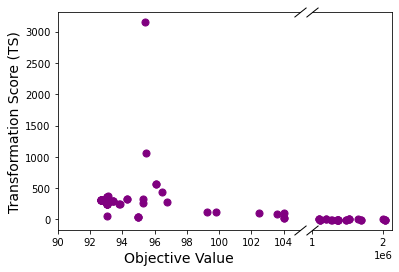

In [143]:
f,ax = plt.subplots(1,2, figsize=(6,4), gridspec_kw={'width_ratios': [3, 1]})

ax0 = ax[0].scatter(tsov1['objective'], tsov1['TS'], c = 'purple', s=50)
ax[0].set_xlim(90,105)

ax1 = ax[1].scatter(tsov1['objective'], tsov1['TS'], c = 'purple', s = 50) # Teal: '#008080'
ax[1].set_xlim(1e6,)

# Remove borders/tick marks from ax[0]
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].tick_params(axis='y', left = False, labelleft=False)

# Set vertical lines
d = 0.8  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot([1, 1], [1, 0], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 0], [1, 0], transform=ax[1].transAxes, **kwargs)
plt.subplots_adjust(wspace=0.075) 

# Add labels
ax[0].set_ylabel('Transformation Score (TS)', fontsize = 14); 
ax[0].set_xlabel('Objective Value', fontsize = 14);

#plt.savefig('../figures/OVvTS1.jpeg',bbox_inches='tight', dpi = 600)

## Test 2

In [233]:
# Filter vref to only include rxns present in test-2 model (ref2)
vref2 = vref.loc[[x.id for x in ref2.reactions]]
vtar2 = vtar.loc[[x.id for x in ref2.reactions]]
e2 = epsilon0.loc[[x.id for x in ref2.reactions]]

In [346]:
sdf_2 = successfulRxnClassification(rxnko_2, right1, left1, vref2, e2)

In [347]:
ts_2 = transformationScore(rxnko_2, sdf_2, vref2)

/var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/ipykernel_1589/3603546667.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ts = pd.Series()
/var/folders/85/n42jk96d3hsbdfcjbr1qlmb80000gp/T/ipykernel_1589/3603546667.py:7: RuntimeWarning: invalid value encountered in double_scalars
  ts0 = (np.abs(vref[s] - rxnko.loc[s,x]).sum() - np.abs(vref[us] - rxnko.loc[us,x]).sum())/np.abs(vref[rs] - rxnko.loc[rs,x]).sum() # Transformation score formula


In [332]:
tsov2 = pd.concat([test2_ts.rename('TS'), objval2.rename('objective')], axis = 1)

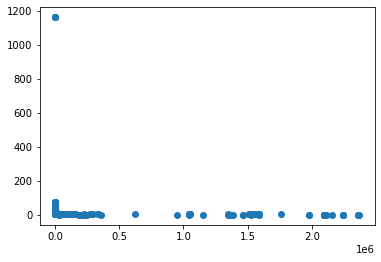

In [333]:
plt.scatter(tsov2['objective'], tsov2['TS'])

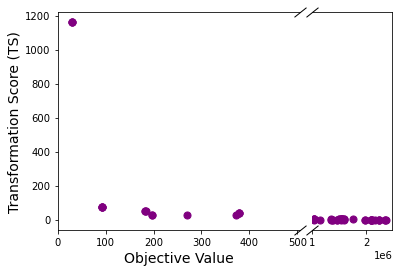

In [272]:
f,ax = plt.subplots(1,2, figsize=(6,4), gridspec_kw={'width_ratios': [3, 1]})

ax0 = ax[0].scatter(tsov2['objective'], tsov2['TS'], c = 'purple', s=50)
ax[0].set_xlim(0,505)

ax1 = ax[1].scatter(tsov2['objective'], tsov2['TS'], c = 'purple', s = 50) # Teal: '#008080'
ax[1].set_xlim(1e6,)

# Remove borders/tick marks from ax[0]
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].tick_params(axis='y', left = False, labelleft=False)

# Set vertical lines
d = 0.8  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot([1, 1], [1, 0], transform=ax[0].transAxes, **kwargs)
ax[1].plot([0, 0], [1, 0], transform=ax[1].transAxes, **kwargs)
plt.subplots_adjust(wspace=0.075) 

# Add labels
ax[0].set_ylabel('Transformation Score (TS)', fontsize = 14); 
ax[0].set_xlabel('Objective Value', fontsize = 14);

#plt.savefig('../figures/OVvTS1.jpeg',bbox_inches='tight', dpi = 600)

## CHECKPOINT

In [ ]:
# Add reference and target flux solution
#rxnko_2.insert(0, 'Control', vref2)
#rxnko_2.insert(0, 'Target', vtar2)

In [89]:
# Load visualization libraries
import matplotlib as plt
import matplotlib.colors as colors
from matplotlib.legend_handler import HandlerPatch
from matplotlib.lines import Line2D    
import seaborn as sns
import pandas as pd
import cobra

In [91]:
# Load models
cd630=cobra.io.read_sbml_model("models/iCdG709.sbml")

https://identifiers.org/seed.reaction/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


In [8]:
tsov2 = pd.read_csv('../data/mtaTS_2.csv', index_col=0)
rxnko_2 = pd.read_csv('../data/mtaRxnKO_2.csv', index_col=0)
sdf_2 = pd.read_csv('../data/mtaSDF_2.csv', index_col=0)

In [10]:
ts2_top50 = tsov2.sort_values('TS', ascending = False).head(50).index.to_list()
ts2_52 = ['Target','Control'] + ts2_top50 

In [11]:
# Remove rxns that were unsucessfully transformed in all rxn KO conditions
unsFilt2 = (sdf_2.iloc[:,2:] == 0).all(axis = 1) # 14 rxns were unsuccessfully transformed across all rxn KO conditions
unsFilt2 = sdf_2.loc[~(unsFilt2==True)].index.to_list()
ko2df = sdf_2.loc[unsFilt2] 

In [369]:
(sdf_2.iloc[:,2:] == 0).all(axis = 1).value_counts() # 87 rxns successfully changed in at least one condition
(ko2df.iloc[:,2:].sum(axis = 0)==0).value_counts() # Each rxn KO condition altered flux in at least one rxn

False    394
dtype: int64

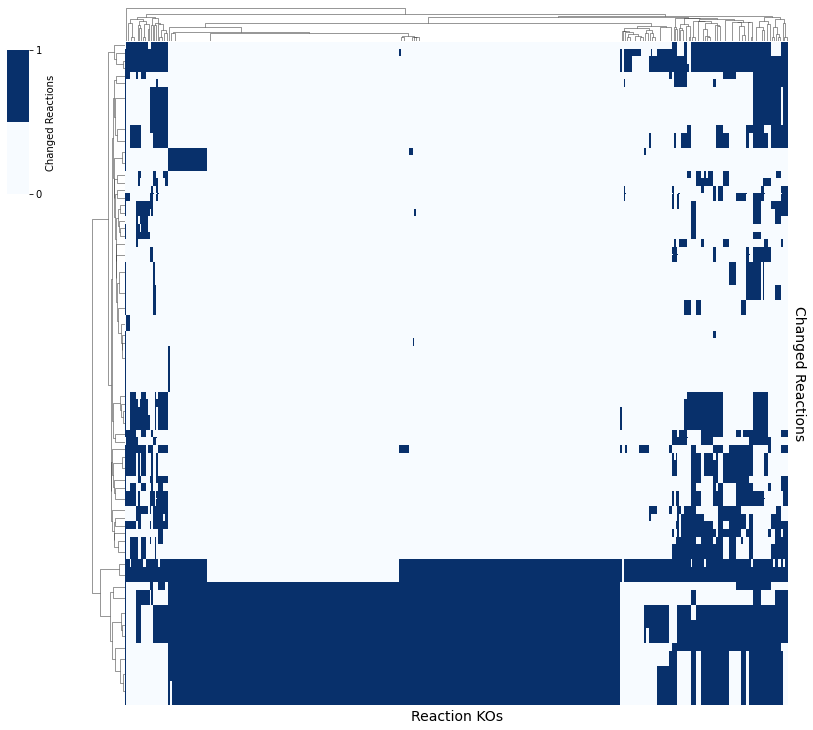

In [515]:
ax = sns.clustermap(ko2df,
                    cmap=plt.cm.get_cmap('Blues', 2),
                    dendrogram_ratio=0.05,
                    yticklabels=False,
                    xticklabels=False,
                    #linewidths=0.005,
                    cbar_pos=(-0.1, 0.725, 0.03, 0.2),
                    cbar_kws={"ticks": range(2), "label": "Changed Reactions"}
                   )

ax.ax_heatmap.set_xlabel('Reaction KOs', fontsize = 14);
ax.ax_heatmap.set_ylabel('Changed Reactions', fontsize = 14, rotation = 270, verticalalignment = 'bottom');

#plt.savefig('../figures/mtaKOvsChanged1.jpeg',bbox_inches='tight', dpi = 600)

In [12]:
# Filter KO dataframe to top 50 TS scores, remove reactions unchanged across all conditions

# Remove rxns that were unsucessfully transformed in all rxn KO conditions
unsFilt2_1 = (ko2df[ts2_top50].iloc[:,2:] == 0).all(axis = 1) # 41 rxns were unsuccessfully transformed across all rxn KO conditions
unsFilt2_1 = ko2df[ts2_top50].loc[~(unsFilt2_1==True)].index.to_list()
ko2df_1 = ko2df[ts2_top50].loc[unsFilt2_1] 

In [76]:
fml = ko2df[ts2_top50].dropna(how='all',axis=0)
for x in range(len(fml.columns)):
    for y in range(len(fml.index)):
        if fml.iloc[y,x]=='unsuccess':
            fml.iloc[y,x]=0
        else: fml.iloc[y,x]=1

In [81]:
fml_ind = (['rxn00297_c', 'rxn02269_c', 'rxn03908_c', 'rxn08352_c', 'rxn05244_c',
       'rxn00085_c', 'rxn03909_c', 'ID003_c', 'EX_cpd00072_e', 'rxn05316_c',
       'R00258_c', 'rxn03910_c', 'rxn00097_c', 'rxn00933_c', 'rxn01358_c',
       'rxn00134_c', 'rxn05293_c', 'rxn05672_c', 'rxn00711_c', 'rxn03907_c',
       'EX_cpd19585_e', 'rxn00001_c', 'rxn01575_c', 'EX_cpd00067_e',
       'R01174_3_c', 'rxn00293_c', 'rxn05243_c', 'rxn00139_c', 'rxn00292_c',
       'rxn05547_c', 'rxn00193_c', 'rxn01953_c', 'rxn01345_c', 'EX_cpd00107_e',
       'EX_cpd00186_e', 'rxn09341_c', 'rxn04996_c', 'EX_cpd00322_e',
       'rxn00926_c', 'rxn05554_c', 'rxn03958_c', 'rxn05209_c', 'rxn12646_c',
       'rxn10840_c', 'EX_cpd00246_e', 'rxn01138_c'])

In [84]:
ko2df_2 = fml.loc[fml_ind,]

In [148]:
ko2df_2.iloc[colDend, :].index

Index(['rxn04996_c', 'rxn00933_c', 'rxn00926_c', 'rxn08352_c', 'EX_cpd00067_e',
       'rxn10840_c', 'rxn00097_c', 'rxn01138_c', 'rxn00134_c', 'rxn09341_c',
       'rxn01358_c', 'rxn05316_c', 'EX_cpd00246_e', 'rxn03958_c', 'rxn03907_c',
       'rxn05293_c', 'rxn03910_c', 'rxn03908_c', 'rxn03909_c', 'rxn05243_c',
       'EX_cpd00107_e', 'rxn05554_c', 'EX_cpd00072_e', 'R00258_c',
       'rxn01345_c', 'rxn00001_c', 'rxn00293_c', 'rxn01953_c', 'rxn00297_c',
       'rxn00292_c', 'rxn05547_c', 'rxn12646_c', 'EX_cpd00186_e', 'rxn05672_c',
       'rxn00193_c', 'R01174_3_c', 'rxn01575_c', 'EX_cpd19585_e', 'rxn02269_c',
       'ID003_c', 'rxn05244_c', 'EX_cpd00322_e', 'rxn00085_c', 'rxn05209_c',
       'rxn00711_c', 'rxn00139_c'],
      dtype='object')

In [13]:
directionDict = dict(zip(mwdf.loc[mwdf['rxn'].isin(ko2df_1.index.to_list()), 'rxn'], mwdf.loc[mwdf['rxn'].isin(ko2df_1.index.to_list()), 'group2']))

NameError: name 'mwdf' is not defined

In [596]:
# Column map (binary toxin labels)
rowDict1={
    'right':'#39675a',
    'left':'#b4c3a8'
        }

rowNwk1 = pd.Series(directionDict)
rowMap1 = pd.Series(rowNwk1).map(rowDict1)

In [149]:
rxnPathDict = dict(zip([x for x in ko2df_2.iloc[colDend, :].index.to_list()], path))

In [107]:
rxnPathDict = dict(zip([x for x in fml_ind], path))

In [15]:
rxnPathDict = {'dimethyallyl diphosphate:NADP+ oxidoreductase': 'Terpenoid backbone biosynthesis',
 'proline racemase': 'Stickland fermentation',
 'Adenine aminohydrolase': 'Purine metabolism',
 '(E)-4-hydroxy-3-methylbut-2-en-1-yl diphosphate reductase': 'Terpenoid backbone biosynthesis',
 'H+ exchange': 'Transport',
 'L-arginine transport via diffusion (extracellular to periplasm)': 'Transport',
 'ATP:AMP phosphotransferase': 'Purine metabolism',
 'Adenosine:phosphate alpha-D-ribosyltransferase': 'Purine metabolism',
 "ATP:adenosine 5'-phosphotransferase": 'Purine metabolism',
 'UDP-N-acetyl-D-glucosamine pyrophosphohydrolase (periplasm)': 'Carbohydrate Metabolism',
 'inosine:phosphate alpha-D-ribosyltransferase': 'Purine metabolism',
 'Inosine transport in via proton symport': 'Purine metabolism',
 'Inosine exchange': 'Purine metabolism',
 '1-Deoxy-D-xylulose-5-phosphate isomeroreductase': 'Terpenoid backbone biosynthesis',
 'CTP: 2-C-Methyl-D-erythritol 4-phosphate cytidylyltransferase': 'Terpenoid backbone biosynthesis',
 '2C-methyl-D-erythritol 2,4 cyclodiphosphate dehydratase': 'Terpenoid backbone biosynthesis',
 "2-Phospho-4-(cytidine 5'-diphospho)-2-C-methyl-D-erythritol CMP-lyase (cyclizing)": 'Terpenoid backbone biosynthesis',
 "ATP:4-(Cytidine 5'-diphospho)-2-C-methyl-D-erythritol 2-phosphotransferase": 'Terpenoid backbone biosynthesis',
 '1-Deoxy-D-xylulose-5-phosphate pyruvate-lyase (carboxylating)': 'Terpenoid backbone biosynthesis',
 'L-Leucine hydrogen symport': 'Transport',
 'L-Leucine exchange': 'Transport',
 'Fructose-6-phosphate transport via phosphate antiport': 'Carbohydrate metabolism',
 'D-fructose-6-phosphate exchange': 'Carbohydrate metabolism',
 'Alanine transaminase': 'Amino acid metabolism',
 'Sedoheptulose 1,7-bisphosphate 1-phosphohydrolase': 'Carbohydrate metabolism',
 'diphosphate phosphohydrolase': 'Other',
 'UTP:N-acetyl-alpha-D-glucosamine-1-phosphate uridylyltransferase': 'Carbohydrate metabolism',
 'N-acetyl-D-mannosamine N-acetylmannosaminohydrolase': 'Carbohydrate metabolism',
 'UDP-N-acetyl-D-glucosamine 2-epimerase': 'Carbohydrate metabolism',
 'oligopeptide-transporting ATPase': 'Amino acid metabolism',
 'Gly-Gln aminopeptidase': 'Amino acid metabolism',
 'D-Glutamate exchange': 'Amino acid metabolism',
 'D-glutamate transport in via proton symport': 'Amino acid metabolism',
 'glutamate racemase': 'Amino acid metabolism',
 'Phosphate butyryltransferase': 'Amino acid metabolism',
 'L-isoleucine aminotransferase': 'Amino acid metabolism',
 '2-Methylbutyrate exchange': 'Transport',
 '(S)-3-methyl-2-oxopentanoate:NAD+ 2-oxidoreductase (CoA-methylbutanoylating)': 'Stickland fermentation',
 '2-Methylbutyrate diffusion': 'Transport',
 'Branched chain amino acid:H+ symporter (Isoleucine)': 'Transport',
 'L-Isoleucine exchange': 'Transport',
 'L-Glutamate:NADP+ oxidoreductase (transaminating)': 'Stickland fermentation',
 'Sodium hydrogen symporter': 'Transport',
 'UMP:diphosphate phospho-alpha-D-ribosyltransferase': 'Pyrimidine metabolism',
 'AMP:diphosphate phospho-D-ribosyltransferase': 'Purine metabolism'}

In [131]:
# Updated
rxnPathDict = {'dimethyallyl diphosphate:NADP+ oxidoreductase': 'Other',
 'proline racemase': 'Stickland fermentation',
 'Adenine aminohydrolase': 'Nucleotide metabolism',
 '(E)-4-hydroxy-3-methylbut-2-en-1-yl diphosphate reductase': 'Other',
 'H+ exchange': 'Other',
 'L-arginine transport via diffusion (extracellular to periplasm)': 'Amino acid metabolism',
 'ATP:AMP phosphotransferase': 'Nucleotide metabolism',
 'Adenosine:phosphate alpha-D-ribosyltransferase': 'Nucleotide metabolism',
 "ATP:adenosine 5'-phosphotransferase": 'Nucleotide metabolism',
 'UDP-N-acetyl-D-glucosamine pyrophosphohydrolase (periplasm)': 'Carbohydrate Metabolism',
 'inosine:phosphate alpha-D-ribosyltransferase': 'Nucleotide metabolism',
 'Inosine transport in via proton symport': 'Nucleotide metabolism',
 'Inosine exchange': 'Nucleotide metabolism',
 '1-Deoxy-D-xylulose-5-phosphate isomeroreductase': 'Other',
 'CTP: 2-C-Methyl-D-erythritol 4-phosphate cytidylyltransferase': 'Other',
 '2C-methyl-D-erythritol 2,4 cyclodiphosphate dehydratase': 'Other',
 "2-Phospho-4-(cytidine 5'-diphospho)-2-C-methyl-D-erythritol CMP-lyase (cyclizing)": 'Other',
 "ATP:4-(Cytidine 5'-diphospho)-2-C-methyl-D-erythritol 2-phosphotransferase": 'Other',
 '1-Deoxy-D-xylulose-5-phosphate pyruvate-lyase (carboxylating)': 'Other',
 'L-Leucine hydrogen symport': 'Amino acid metabolism',
 'L-Leucine exchange': 'Amino acid metabolism',
 'Fructose-6-phosphate transport via phosphate antiport': 'Carbohydrate metabolism',
 'D-fructose-6-phosphate exchange': 'Carbohydrate metabolism',
 'Alanine transaminase': 'Amino acid metabolism',
 'Sedoheptulose 1,7-bisphosphate 1-phosphohydrolase': 'Carbohydrate metabolism',
 'diphosphate phosphohydrolase': 'Other',
 'UTP:N-acetyl-alpha-D-glucosamine-1-phosphate uridylyltransferase': 'Carbohydrate metabolism',
 'N-acetyl-D-mannosamine N-acetylmannosaminohydrolase': 'Carbohydrate metabolism',
 'UDP-N-acetyl-D-glucosamine 2-epimerase': 'Carbohydrate metabolism',
 'oligopeptide-transporting ATPase': 'Amino acid metabolism',
 'Gly-Gln aminopeptidase': 'Amino acid metabolism',
 'D-Glutamate exchange': 'Amino acid metabolism',
 'D-glutamate transport in via proton symport': 'Amino acid metabolism',
 'glutamate racemase': 'Amino acid metabolism',
 'Phosphate butyryltransferase': 'Amino acid metabolism',
 'L-isoleucine aminotransferase': 'Amino acid metabolism',
 '2-Methylbutyrate exchange': 'Stickland fermentation',
 '(S)-3-methyl-2-oxopentanoate:NAD+ 2-oxidoreductase (CoA-methylbutanoylating)': 'Stickland fermentation',
 '2-Methylbutyrate diffusion': 'Stickland fermentation',
 'Branched chain amino acid:H+ symporter (Isoleucine)': 'Amino acid metabolism',
 'L-Isoleucine exchange': 'Amino acid metabolism',
 'L-Glutamate:NADP+ oxidoreductase (transaminating)': 'Stickland fermentation',
 'Sodium hydrogen symporter': 'Other',
 'UMP:diphosphate phospho-alpha-D-ribosyltransferase': 'Nucleotide metabolism',
 'AMP:diphosphate phospho-D-ribosyltransferase': 'Nucleotide metabolism'}

In [133]:
for x in rxnPathDict:
    print(cd630.reactions.get_by_any(x).id)

KeyError: 'dimethyallyl diphosphate:NADP+ oxidoreductase'

In [785]:
mwdf.loc[mwdf['group2'].isin(['right','left']), ['rxn','group2']]

,rxn,group2
1,rxn01358_c,right
5,rxn04996_c,left
8,rxn00001_c,right
14,rxn00148_c,left
15,rxn05569_c,left
...,...,...
359,EX_cpd00207_e,right
360,rxn05547_c,left
362,rxn12646_c,left
375,rxn00173_c,right


In [786]:
rowMap1

rxn01358_c       #39675a
rxn04996_c       #b4c3a8
rxn00001_c       #39675a
rxn00292_c       #b4c3a8
rxn00097_c       #39675a
rxn00926_c       #b4c3a8
rxn03958_c       #b4c3a8
rxn00139_c       #b4c3a8
rxn03910_c       #39675a
rxn03908_c       #39675a
rxn08352_c       #39675a
rxn01345_c       #b4c3a8
rxn00711_c       #39675a
rxn01138_c       #b4c3a8
rxn00297_c       #39675a
rxn03907_c       #39675a
rxn05209_c       #b4c3a8
rxn03909_c       #39675a
rxn00134_c       #39675a
rxn00085_c       #39675a
rxn00193_c       #b4c3a8
rxn00933_c       #39675a
rxn00293_c       #39675a
EX_cpd00067_e    #39675a
EX_cpd00322_e    #b4c3a8
rxn05244_c       #39675a
EX_cpd00107_e    #b4c3a8
rxn05243_c       #39675a
rxn01575_c       #39675a
R01174_3_c       #39675a
ID003_c          #39675a
EX_cpd19585_e    #39675a
rxn02269_c       #39675a
rxn05293_c       #39675a
rxn09341_c       #b4c3a8
rxn01953_c       #b4c3a8
rxn10840_c       #b4c3a8
rxn05554_c       #b4c3a8
EX_cpd00072_e    #39675a
rxn05316_c       #39675a


In [150]:
# Column map 
rowDict2={
    'Stickland fermentation':'#440154',#'darkred',
    'Amino acid metabolism':'#3b528b',#'red',
    'Carbohydrate metabolism':'#21918c',#'#d24e01',
    'Nucleotide metabolism':'#5ec962',#'orange',
    'Other':'#fde725'#'goldenrod', 
    #'Transport':#'gold',
    #'Other':'lemonchiffon'#'oldlace'
        }

rowNwk2 = pd.Series(rxnPathDict)
rowMap2 = pd.Series(rowNwk2).map(rowDict2)

In [137]:
cd630.reactions.get_by_id('rxn00297_c')

Reaction identifier,rxn00297_c
Name,UDP-N-acetyl-D-glucosamine 2-epimerase
Memory address,0x07fd91d960df0
Stoichiometry,cpd00037_c <=> cpd00861_c UDP-N-acetylglucosamine <=> UDP-N-acetyl-D-mannosamine
GPR,272563.8.peg.1085
Lower bound,-1000.0
Upper bound,1000.0


In [136]:
rowMap2
#dimethyallyl diphosphate:NADP+ oxidoreductase      

rxn00297_c       #fde725
rxn02269_c       #440154
rxn03908_c       #5ec962
rxn08352_c       #fde725
rxn05244_c       #fde725
rxn00085_c       #3b528b
rxn03909_c       #5ec962
ID003_c          #5ec962
EX_cpd00072_e    #5ec962
rxn05316_c       #21918c
R00258_c         #5ec962
rxn03910_c       #5ec962
rxn00097_c       #5ec962
rxn00933_c       #fde725
rxn01358_c       #fde725
rxn00134_c       #fde725
rxn05293_c       #fde725
rxn05672_c       #fde725
rxn00711_c       #fde725
rxn03907_c       #3b528b
EX_cpd19585_e    #3b528b
rxn00001_c       #21918c
rxn01575_c       #21918c
EX_cpd00067_e    #3b528b
R01174_3_c       #21918c
rxn00293_c       #fde725
rxn05243_c       #21918c
rxn00139_c       #21918c
rxn00292_c       #21918c
rxn05547_c       #21918c
rxn00193_c       #3b528b
rxn01953_c       #3b528b
rxn01345_c       #3b528b
EX_cpd00107_e    #3b528b
EX_cpd00186_e    #3b528b
rxn09341_c       #3b528b
rxn04996_c       #3b528b
EX_cpd00322_e    #440154
rxn00926_c       #440154
rxn05554_c       #440154


In [673]:
ko2df_1.index.to_list()

Index(['rxn00297_c', 'rxn02269_c', 'rxn03908_c', 'rxn08352_c', 'rxn05244_c',
       'rxn00085_c', 'rxn03909_c', 'ID003_c', 'EX_cpd00072_e', 'rxn05316_c',
       'R00258_c', 'rxn03910_c', 'rxn00097_c', 'rxn00933_c', 'rxn01358_c',
       'rxn00134_c', 'rxn05293_c', 'rxn05672_c', 'rxn00711_c', 'rxn03907_c',
       'EX_cpd19585_e', 'rxn00001_c', 'rxn01575_c', 'EX_cpd00067_e',
       'R01174_3_c', 'rxn00293_c', 'rxn05243_c', 'rxn00139_c', 'rxn00292_c',
       'rxn05547_c', 'rxn00193_c', 'rxn01953_c', 'rxn01345_c', 'EX_cpd00107_e',
       'EX_cpd00186_e', 'rxn09341_c', 'rxn04996_c', 'EX_cpd00322_e',
       'rxn00926_c', 'rxn05554_c', 'rxn03958_c', 'rxn05209_c', 'rxn12646_c',
       'rxn10840_c', 'EX_cpd00246_e', 'rxn01138_c'],
      dtype='object')

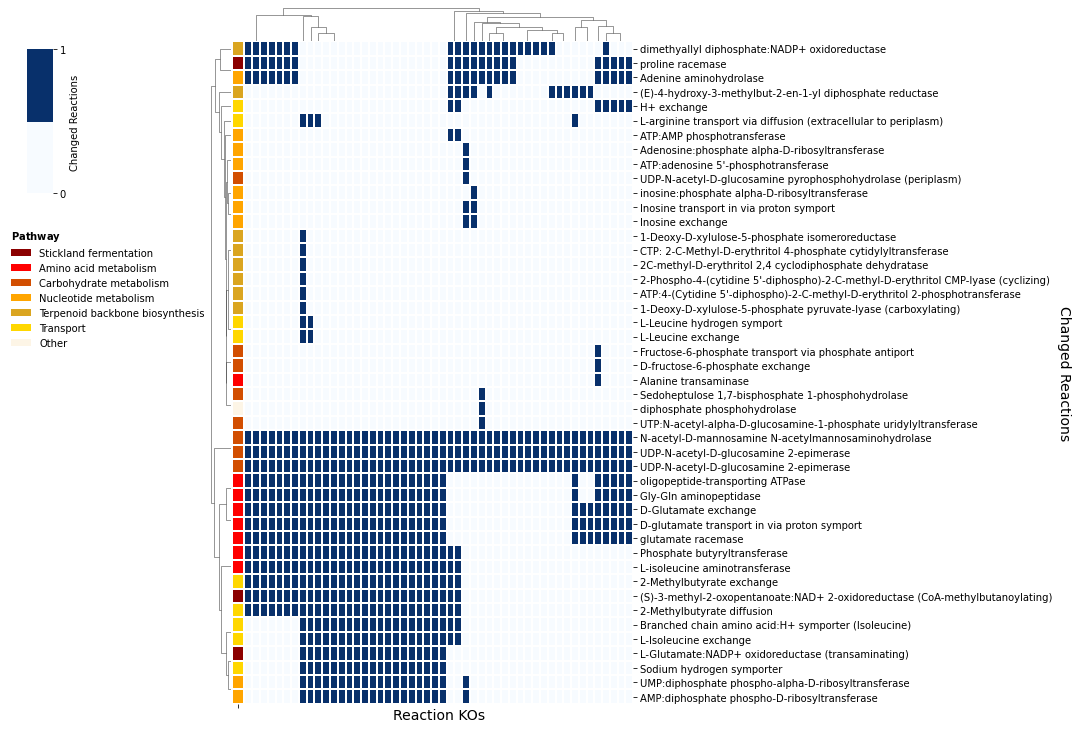

In [709]:
ax = sns.clustermap(ko2df_1,
                    cmap=plt.cm.get_cmap('Blues', 2),
                    row_colors=(rowMap2),
                    dendrogram_ratio=0.05,
                    yticklabels=[cd630.reactions.get_by_id(x).name for x in ko2df_1.index.to_list()],
                    ##xticklabels=[cd630.reactions.get_by_id(x).name for x in ko2col.columns.to_list()],
                    xticklabels = False,
                    figsize = (12,10),
                    linewidths=1,
                    cbar_pos=(-0.2, 0.725, 0.03, 0.2),
                    cbar_kws={"ticks": range(2), "label": "Changed Reactions"}
                   )

ax.ax_heatmap.set_xlabel('Reaction KOs', fontsize = 14);
ax.ax_heatmap.set_ylabel('Changed Reactions', fontsize = 14, rotation = 270, verticalalignment = 'bottom');

#ytickLabels = [cd630.reactions.get_by_id(x).name for x in ko2Ind.index.to_list()]
#ax.ax_heatmap.set_yticklabels(ytickLabels)

#xtickLabels = [cd630.reactions.get_by_id(x).name for x in ko2col.columns.to_list()]
#ax.ax_heatmap.set_xticklabels(xtickLabels, rotation = 45)

# Direction Legend
#for label in rowDict:
#    ax.ax_row_dendrogram.bar(0,0, color = rowDict[label], label = label, linewidth=0)
#ax.ax_row_dendrogram.legend(loc = [-9.5,0.65], title='$\\bf{Flux Change}$',frameon=False)._legend_box.align = "left"

# Path Legend
# create a list for the bar plot patches
pathList = []
for label in rowDict2:
    x = ax.ax_col_dendrogram.bar(0, 0, color=rowDict2[label], label=label, linewidth=0)
    pathList.append(x)
# Add path legend
pathLegend = plt.legend(pathList, rowDict2, loc=[-.75, -1.1], title='$\\bf{Pathway}$', frameon = False)._legend_box.align = 'left'

# Row dendrogram
rowDend = ax.dendrogram_row.reordered_ind
colDend = ax.dendrogram_col.reordered_ind

#plt.savefig('../figures/mtaKOvsChanged2.jpeg',bbox_inches='tight', dpi = 600)

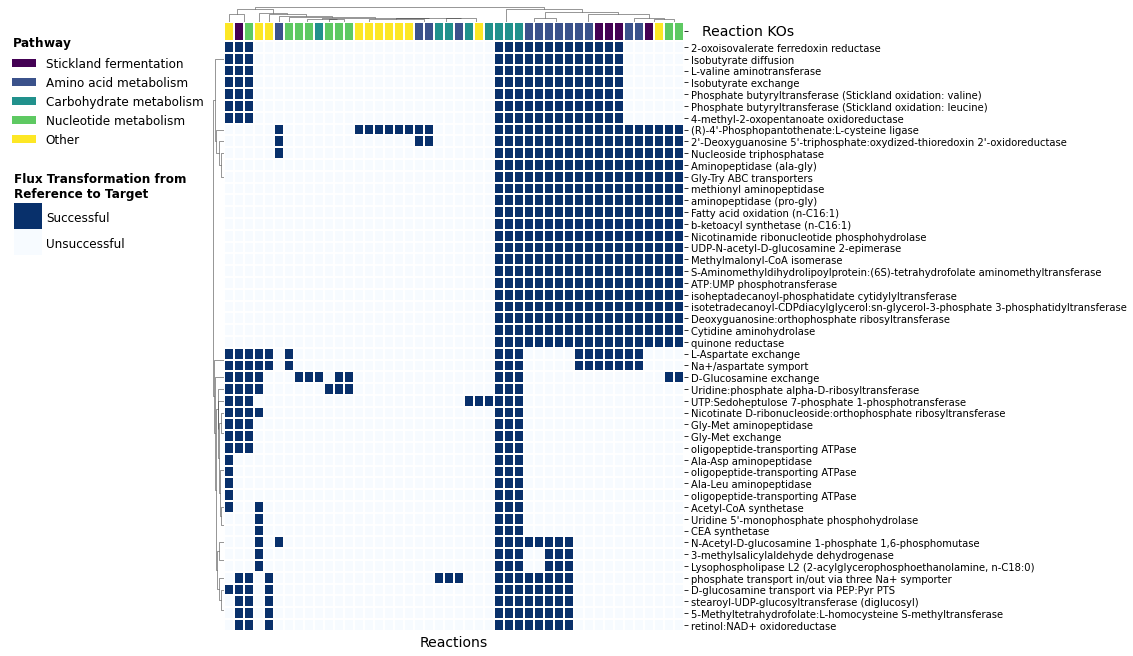

In [1001]:
#foo = [cd630.reactions.get_by_id(x).name for x in ko2df_2.columns.to_list()]
#foo[20] = 'Phosphate butyryltransferase (Stickland oxidation: leucine)'
#foo[22] = 'Phosphate butyryltransferase (Stickland oxidation: valine)'
#foo[-10] = 'S-Aminomethyldihydrolipoylprotein:(6S)-tetrahydrofolate aminomethyltransferase'

ax = sns.clustermap(ko2df_2.astype('float').T,
                    cmap=plt.cm.get_cmap('Blues', 2),
                    col_colors=rowMap2,
                    dendrogram_ratio=0.025,
                    yticklabels=foo, #[cd630.reactions.get_by_id(x).name for x in ko2df_1.columns.to_list()],
                    #xticklabels=[cd630.reactions.get_by_id(x).name for x in ko2df_1.T.columns.to_list()],
                    xticklabels = False,
                    figsize = (13,9),
                    linewidths=1,
                    cbar_pos=(-0.2, 0.6, 0.03, 0.08), ## (left, bottom, width, height)
                    cbar_kws={"ticks": np.arange(0.25,1, 0.5), "label": ""}
                   )

ax.ax_heatmap.set_xlabel('Reactions', fontsize = 14);
ax.ax_heatmap.set_ylabel('');
plt.text(x=24.5, y=4.23, s='Reaction KOs', fontsize = 14)
#ytickLabels = [cd630.reactions.get_by_id(x).name for x in ko2Ind.index.to_list()]
#ax.ax_heatmap.set_yticklabels(ytickLabels)
ax.ax_cbar.set_yticklabels(['Unsuccessful','Successful'], fontsize=12)
ax.ax_cbar.tick_params(size=0)
ax.ax_cbar.set_title('Flux Transformation from\nReference to Target', loc='left',weight='bold')

for spine in ax.ax_cbar.spines:
    ax.ax_cbar.spines[spine].set_color('black')
    ax.ax_cbar.spines[spine].set_linewidth(2)

# Path Legend
# create a list for the bar plot patches
pathList = []
for label in rowDict2:
    x = ax.ax_col_dendrogram.bar(0, 0, color=rowDict2[label], label=label, linewidth=0)
    pathList.append(x)
# Add path legend
pathLegend = plt.legend(pathList, rowDict2, loc=[-.25, 2], title='$\\bf{Pathway}$', fontsize=12,frameon = False)._legend_box.align = 'left'


# Row dendrogram
rowDend = ax.dendrogram_row.reordered_ind
colDend = ax.dendrogram_col.reordered_ind

#plt.savefig('../figures/mtaKOvsChanged4.jpeg',bbox_inches='tight', dpi = 600)

In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
rowMap2

rxn00297_c       #fde725
rxn02269_c       #440154
rxn03908_c       #5ec962
rxn08352_c       #fde725
rxn05244_c       #fde725
rxn00085_c       #3b528b
rxn03909_c       #5ec962
ID003_c          #5ec962
EX_cpd00072_e    #5ec962
rxn05316_c       #21918c
R00258_c         #5ec962
rxn03910_c       #5ec962
rxn00097_c       #5ec962
rxn00933_c       #fde725
rxn01358_c       #fde725
rxn00134_c       #fde725
rxn05293_c       #fde725
rxn05672_c       #fde725
rxn00711_c       #fde725
rxn03907_c       #3b528b
EX_cpd19585_e    #3b528b
rxn00001_c       #21918c
rxn01575_c       #21918c
EX_cpd00067_e    #3b528b
R01174_3_c       #21918c
rxn00293_c       #fde725
rxn05243_c       #21918c
rxn00139_c       #21918c
rxn00292_c       #21918c
rxn05547_c       #21918c
rxn00193_c       #3b528b
rxn01953_c       #3b528b
rxn01345_c       #3b528b
EX_cpd00107_e    #3b528b
EX_cpd00186_e    #3b528b
rxn09341_c       #3b528b
rxn04996_c       #3b528b
EX_cpd00322_e    #440154
rxn00926_c       #440154
rxn05554_c       #440154


In [154]:
from matplotlib.colors import ListedColormap

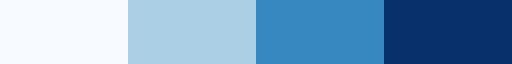

In [166]:
allBlue

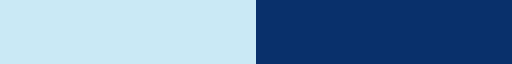

In [169]:
ListedColormap(['#CAE9f5','#09306B'])#'#ABCFE5' ##ececec

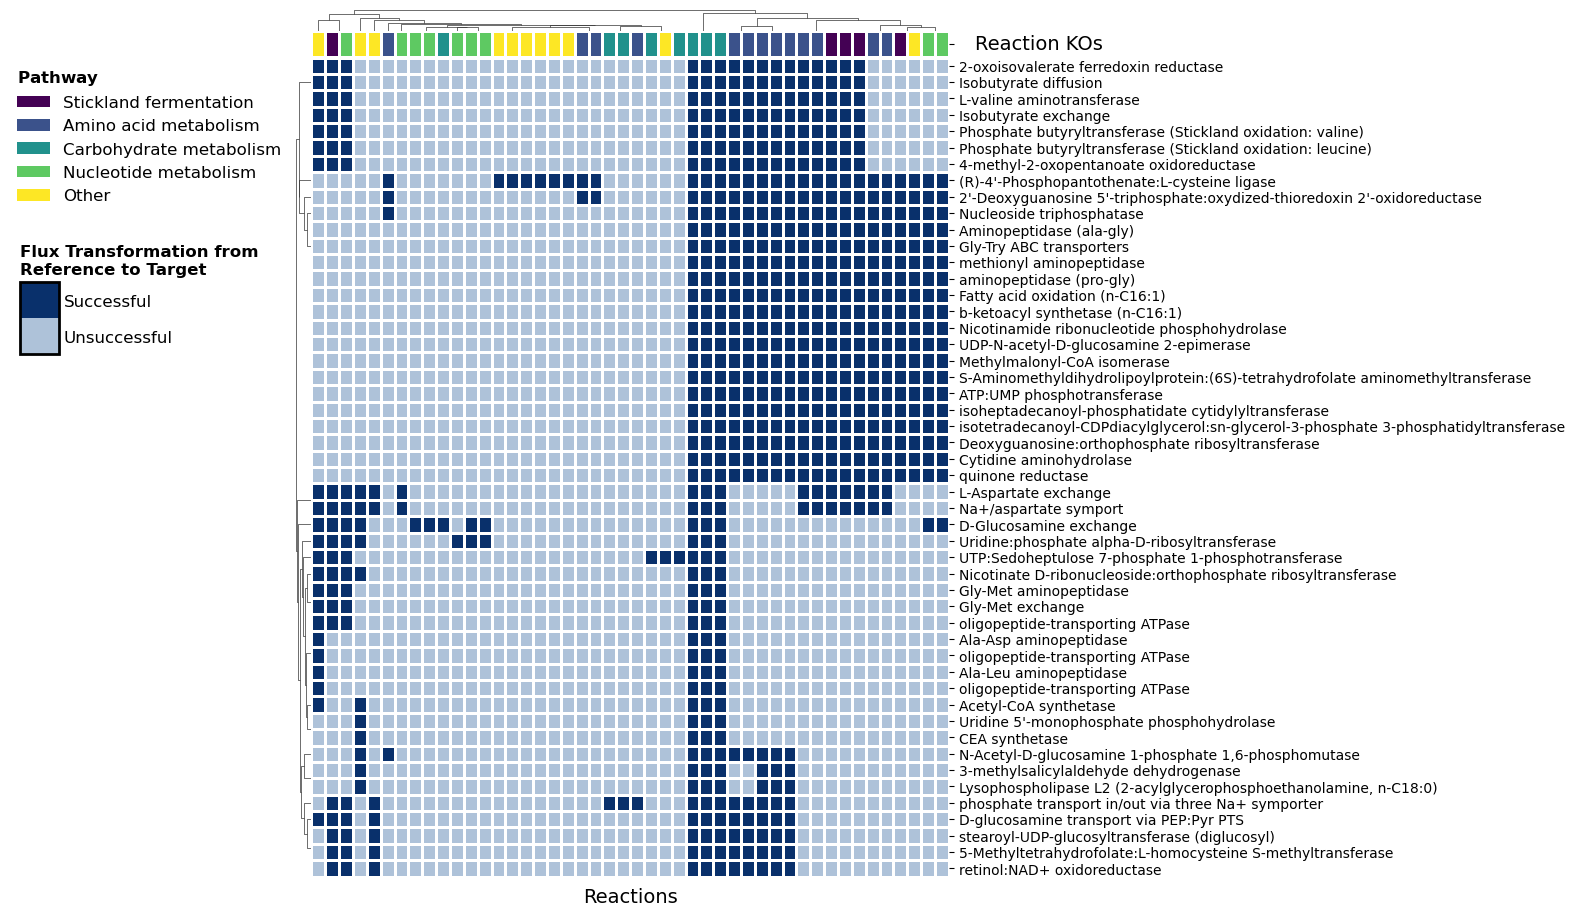

In [178]:
#foo = [cd630.reactions.get_by_id(x).name for x in ko2df_2.columns.to_list()]
#foo[20] = 'Phosphate butyryltransferase (Stickland oxidation: leucine)'
#foo[22] = 'Phosphate butyryltransferase (Stickland oxidation: valine)'
#foo[-10] = 'S-Aminomethyldihydrolipoylprotein:(6S)-tetrahydrofolate aminomethyltransferase'
#f, ax = plt.subplots()
blue2 = ListedColormap(['#aec2d9','#09306B'])

ax = sns.clustermap(ko2df_2.astype('float').T,
                    #cmap=plt.cm.get_cmap('Blues', 2),
                    cmap=blue2,
                    col_colors=rowMap2,
                    dendrogram_ratio=0.025,
                    yticklabels=foo, #[cd630.reactions.get_by_id(x).name for x in ko2df_1.columns.to_list()],
                    #xticklabels=[cd630.reactions.get_by_id(x).name for x in ko2df_1.T.columns.to_list()],
                    xticklabels = False,
                    figsize = (13,9),
                    linewidths=1,
                    cbar_pos=(-0.2, 0.6, 0.03, 0.08), ## (left, bottom, width, height)
                    cbar_kws={"ticks": np.arange(0.25,1, 0.5), "label": ""}
                   )

ax.ax_heatmap.set_xlabel('Reactions', fontsize = 14);
ax.ax_heatmap.set_ylabel('');
plt.text(x=24.5, y=4.23, s='Reaction KOs', fontsize = 14)
#ytickLabels = [cd630.reactions.get_by_id(x).name for x in ko2Ind.index.to_list()]
#ax.ax_heatmap.set_yticklabels(ytickLabels)
ax.ax_cbar.set_yticklabels(['Unsuccessful','Successful'], fontsize=12)
ax.ax_cbar.tick_params(size=0)
ax.ax_cbar.set_title('Flux Transformation from\nReference to Target', loc='left',weight='bold')

for spine in ax.ax_cbar.spines:
    ax.ax_cbar.spines[spine].set_color('black')
    ax.ax_cbar.spines[spine].set_linewidth(2)

# Path Legend
# create a list for the bar plot patches
pathList = []
for label in rowDict2:
    x = ax.ax_col_dendrogram.bar(0, 0, color=rowDict2[label], label=label, linewidth=0)
    pathList.append(x)
# Add path legend
pathLegend = plt.legend(pathList, rowDict2, loc=[-.25, 2], title='$\\bf{Pathway}$', fontsize=12,frameon = False)
pathLegend._legend_box.align = 'left'
pathLegend.get_title().set_fontsize('12')

# Row dendrogram
rowDend = ax.dendrogram_row.reordered_ind
colDend = ax.dendrogram_col.reordered_ind

#plt.savefig('../figures/mtaKOvsChanged5.jpeg',bbox_inches='tight', dpi = 600)

In [906]:
rxnDict = dict('Successful')

NameError: name 'rxnDict' is not defined

In [821]:
[print(x, cd630.reactions.get_by_id(x).name) for x in ko2df_1.T.columns.to_list()]

rxn00297_c UDP-N-acetyl-D-glucosamine 2-epimerase
rxn02269_c (S)-3-methyl-2-oxopentanoate:NAD+ 2-oxidoreductase (CoA-methylbutanoylating)
rxn03908_c ATP:4-(Cytidine 5'-diphospho)-2-C-methyl-D-erythritol 2-phosphotransferase
rxn08352_c (E)-4-hydroxy-3-methylbut-2-en-1-yl diphosphate reductase
rxn05244_c Branched chain amino acid:H+ symporter (Isoleucine)
rxn00085_c L-Glutamate:NADP+ oxidoreductase (transaminating)
rxn03909_c 1-Deoxy-D-xylulose-5-phosphate pyruvate-lyase (carboxylating)
ID003_c 2-Methylbutyrate diffusion
EX_cpd00072_e D-fructose-6-phosphate exchange
rxn05316_c Inosine transport in via proton symport
R00258_c Alanine transaminase
rxn03910_c 2-Phospho-4-(cytidine 5'-diphospho)-2-C-methyl-D-erythritol CMP-lyase (cyclizing)
rxn00097_c ATP:AMP phosphotransferase
rxn00933_c proline racemase
rxn01358_c inosine:phosphate alpha-D-ribosyltransferase
rxn00134_c ATP:adenosine 5'-phosphotransferase
rxn05293_c 2C-methyl-D-erythritol 2,4 cyclodiphosphate dehydratase
rxn05672_c D-glutam

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [910]:
cmpa = plt.cm.get_cmap('Blues', 2)

In [918]:
[print(colors.rgb2hex(cmpa(i))) for i in range(cmpa.N)]

#f7fbff
#08306b


[None, None]

In [944]:
for i in np.arange(0.25,1, 0.5):
    print(i)

0.25
0.75


In [145]:
cd630.reactions.get_by_id('rxn04996_c')

Reaction identifier,rxn04996_c
Name,dimethyallyl diphosphate:NADP+ oxidoreductase
Memory address,0x07fd91c24bdf0
Stoichiometry,cpd00005_c + cpd00067_c + cpd08615_c --> cpd00001_c + cpd00006_c + cpd00202_c NADPH + H+ + 1-Hydroxy-2-methyl-2-butenyl 4-diphosphate --> H2O + NADP + 2-Isopentenyl diphosphate
GPR,272563.8.peg.1908
Lower bound,0.0
Upper bound,1000.0


In [146]:
ko2df_2.iloc[colDend, :].index

Index(['rxn04996_c', 'rxn00933_c', 'rxn00926_c', 'rxn08352_c', 'EX_cpd00067_e',
       'rxn10840_c', 'rxn00097_c', 'rxn01138_c', 'rxn00134_c', 'rxn09341_c',
       'rxn01358_c', 'rxn05316_c', 'EX_cpd00246_e', 'rxn03958_c', 'rxn03907_c',
       'rxn05293_c', 'rxn03910_c', 'rxn03908_c', 'rxn03909_c', 'rxn05243_c',
       'EX_cpd00107_e', 'rxn05554_c', 'EX_cpd00072_e', 'R00258_c',
       'rxn01345_c', 'rxn00001_c', 'rxn00293_c', 'rxn01953_c', 'rxn00297_c',
       'rxn00292_c', 'rxn05547_c', 'rxn12646_c', 'EX_cpd00186_e', 'rxn05672_c',
       'rxn00193_c', 'R01174_3_c', 'rxn01575_c', 'EX_cpd19585_e', 'rxn02269_c',
       'ID003_c', 'rxn05244_c', 'EX_cpd00322_e', 'rxn00085_c', 'rxn05209_c',
       'rxn00711_c', 'rxn00139_c'],
      dtype='object')

In [468]:
# Reorder ko2df using column ordering from heatmap dendrogram
ko2Ind = ko2df_1.iloc[rowDend, :]

In [ ]:
ko2col.columns.to_list()

In [500]:
ko2col = ko2df_1.iloc[:,colDend]

In [98]:
path = ['Other',
 'Stickland fermentation',
 'Nucleotide metabolism',
 'Other', 
 'Other', 
 'Amino acid metabolism',  
'Nucleotide metabolism',
'Nucleotide metabolism',
'Nucleotide metabolism',
'Carbohydrate metabolism',
'Nucleotide metabolism',
'Nucleotide metabolism',
'Nucleotide metabolism',
'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Amino acid metabolism',
 'Amino acid metabolism',
 'Carbohydrate metabolism',
 'Carbohydrate metabolism',
 'Amino acid metabolism',
 'Carbohydrate metabolism',
 'Other',
 'Carbohydrate metabolism',
 'Carbohydrate metabolism',
 'Carbohydrate metabolism',
 'Carbohydrate metabolism',
 'Amino acid metabolism',
 'Amino acid metabolism',
 'Amino acid metabolism',
 'Amino acid metabolism',
 'Amino acid metabolism',
 'Amino acid metabolism',
 'Amino acid metabolism',
 'Stickland fermentation',
 'Stickland fermentation',
 'Stickland fermentation',
 'Amino acid metabolism',
 'Amino acid metabolism',
 'Stickland fermentation',
 'Other',
 'Nucleotide metabolism',
 'Nucleotide metabolism'
]

In [99]:
len(path)

46

In [830]:
fsComparison = pd.concat([vref2[ko2df_1.T.columns.to_list()].rename('ref'), vtar2[ko2df_1.T.columns.to_list()].rename('tar')], axis=1)

In [843]:
fsComparison['name'] = np.nan
for x in fsComparison.index:
    fsComparison.loc[x, 'name'] = cd630.reactions.get_by_id(x).name

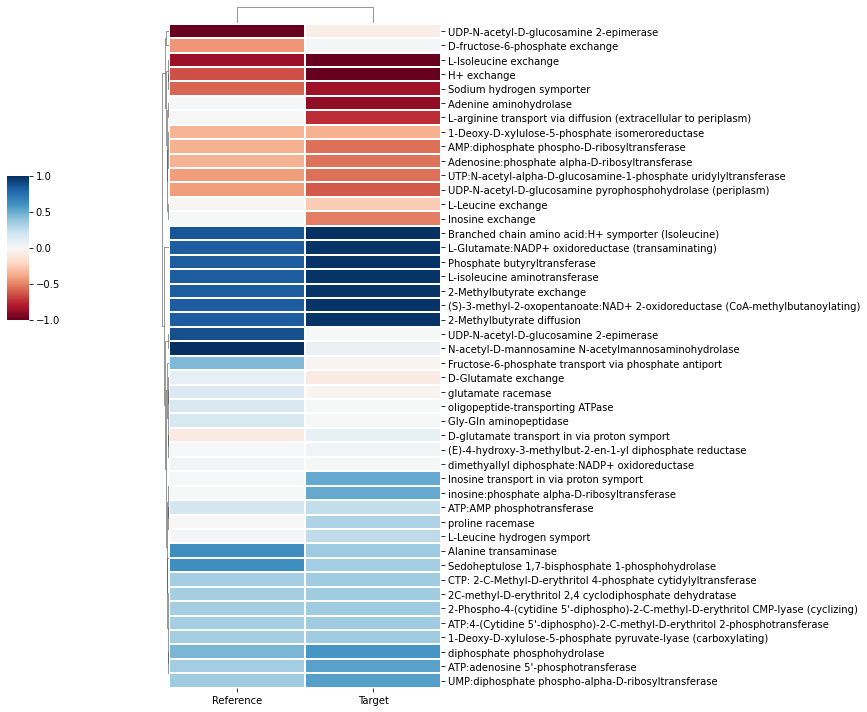

In [1006]:
#sns.clustermap(np.abs(fsComparison[['ref','tar']]/1000),
sns.clustermap((fsComparison[['ref','tar']]/1000),
              cmap='RdBu',
              dendrogram_ratio=0.025,
              yticklabels=fsComparison['name'],
              xticklabels = ['Reference','Target'],
              linewidths=1,
              cbar_pos=(-0.2, 0.55, 0.03, 0.2)) ## (left, bottom, width, height))
#plt.savefig('../figures/mtaRefTarRxns.jpeg',bbox_inches='tight', dpi = 600)

In [868]:
np.abs(fsComparison[['ref','tar']]/1000).T

,rxn00297_c,rxn02269_c,rxn03908_c,rxn08352_c,rxn05244_c,rxn00085_c,rxn03909_c,ID003_c,EX_cpd00072_e,rxn05316_c,...,rxn04996_c,EX_cpd00322_e,rxn00926_c,rxn05554_c,rxn03958_c,rxn05209_c,rxn12646_c,rxn10840_c,EX_cpd00246_e,rxn01138_c
ref,0.999009,0.833420,0.337802,0.000000,0.853153,0.835352,0.337802,0.833420,0.441229,0.000000,...,0.030709,0.853153,0.011955,0.441229,0.337802,0.581062,0.169403,0.006340,0.000000,0.344165
tar,0.062719,0.979177,0.356453,0.032405,1.000000,0.981216,0.356453,0.979177,0.021891,0.509314,...,0.000000,1.000000,0.888487,0.021891,0.356453,0.850338,0.000000,0.741815,0.509314,0.540060


In [834]:
mwdf.loc[mwdf['rxn'].isin(CR), 'group2'] = mwdf.loc[mwdf['rxn'].isin(CR), 'group']

,ref,tar,name
rxn00297_c,-999.009377,-62.719062,NaN
rxn02269_c,833.420230,979.177271,NaN
rxn03908_c,337.802354,356.453335,NaN
rxn08352_c,0.000000,32.404849,NaN
rxn05244_c,853.153435,1000.000000,NaN
rxn00085_c,835.351944,981.215641,NaN
rxn03909_c,337.802354,356.453335,NaN
ID003_c,833.420230,979.177271,NaN
EX_cpd00072_e,-441.229299,21.891280,NaN
rxn05316_c,0.000000,509.314330,NaN


In [495]:
[print(x, cd630.reactions.get_by_id(x).name) for x in ko2Ind.index.to_list()]

rxn04996_c dimethyallyl diphosphate:NADP+ oxidoreductase
rxn00933_c proline racemase
rxn00926_c Adenine aminohydrolase
rxn08352_c (E)-4-hydroxy-3-methylbut-2-en-1-yl diphosphate reductase
EX_cpd00067_e H+ exchange
rxn10840_c L-arginine transport via diffusion (extracellular to periplasm)
rxn00097_c ATP:AMP phosphotransferase
rxn01138_c Adenosine:phosphate alpha-D-ribosyltransferase
rxn00134_c ATP:adenosine 5'-phosphotransferase
rxn09341_c UDP-N-acetyl-D-glucosamine pyrophosphohydrolase (periplasm)
rxn01358_c inosine:phosphate alpha-D-ribosyltransferase
rxn05316_c Inosine transport in via proton symport
EX_cpd00246_e Inosine exchange
rxn03958_c 1-Deoxy-D-xylulose-5-phosphate isomeroreductase
rxn03907_c CTP: 2-C-Methyl-D-erythritol 4-phosphate cytidylyltransferase
rxn05293_c 2C-methyl-D-erythritol 2,4 cyclodiphosphate dehydratase
rxn03910_c 2-Phospho-4-(cytidine 5'-diphospho)-2-C-methyl-D-erythritol CMP-lyase (cyclizing)
rxn03908_c ATP:4-(Cytidine 5'-diphospho)-2-C-methyl-D-erythritol 2-

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

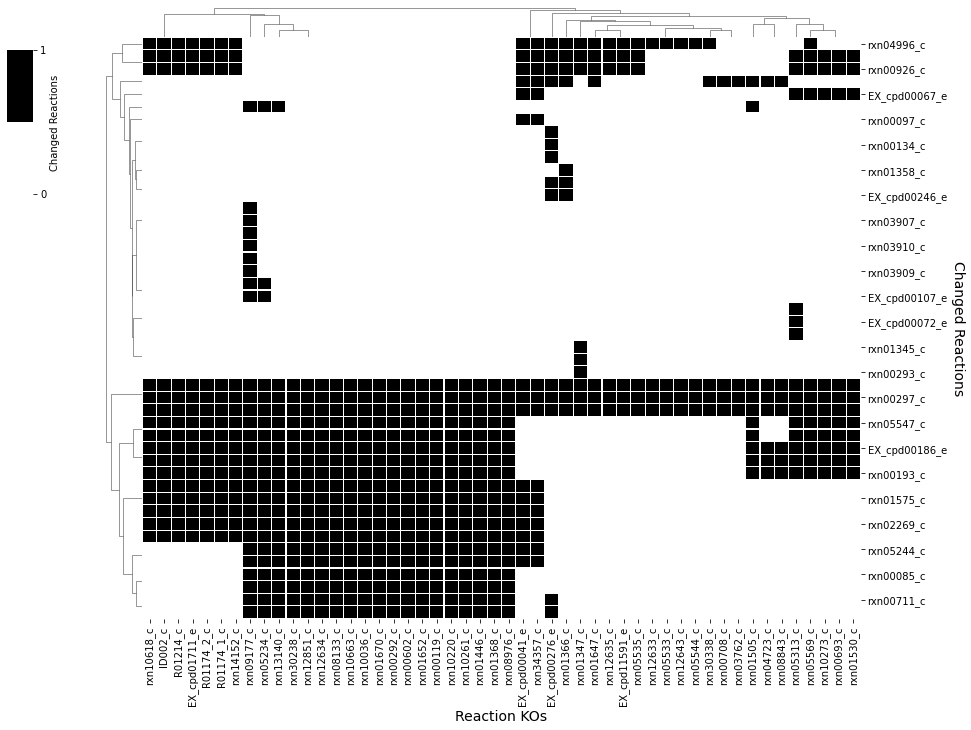

In [489]:
ax = sns.clustermap(ko2df_1,
                    cmap=plt.cm.get_cmap('binary', 2),
                    dendrogram_ratio=0.05,
                    #yticklabels=[x for x in ko2Ind.index.to_list()],
                    #xticklabels=False,
                    figsize = (12,10),
                    linewidths=0.1,
                    cbar_pos=(-0.1, 0.725, 0.03, 0.2),
                    cbar_kws={"ticks": range(2), "label": "Changed Reactions"}
                   )

ax.ax_heatmap.set_xlabel('Reaction KOs', fontsize = 14);
ax.ax_heatmap.set_ylabel('Changed Reactions', fontsize = 14, rotation = 270, verticalalignment = 'bottom');

# Row dendrogram
rowDend = ax.dendrogram_row.reordered_ind


#plt.savefig('../figures/mtaKOvsChanged2.jpeg',bbox_inches='tight', dpi = 600)